## **Importing** **Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# **Dataset**

In [2]:
data=pd.read_csv("/content/parkinsonss.data")


In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
data.shape

(195, 24)

In [7]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [10]:
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

# **Data Visualization**

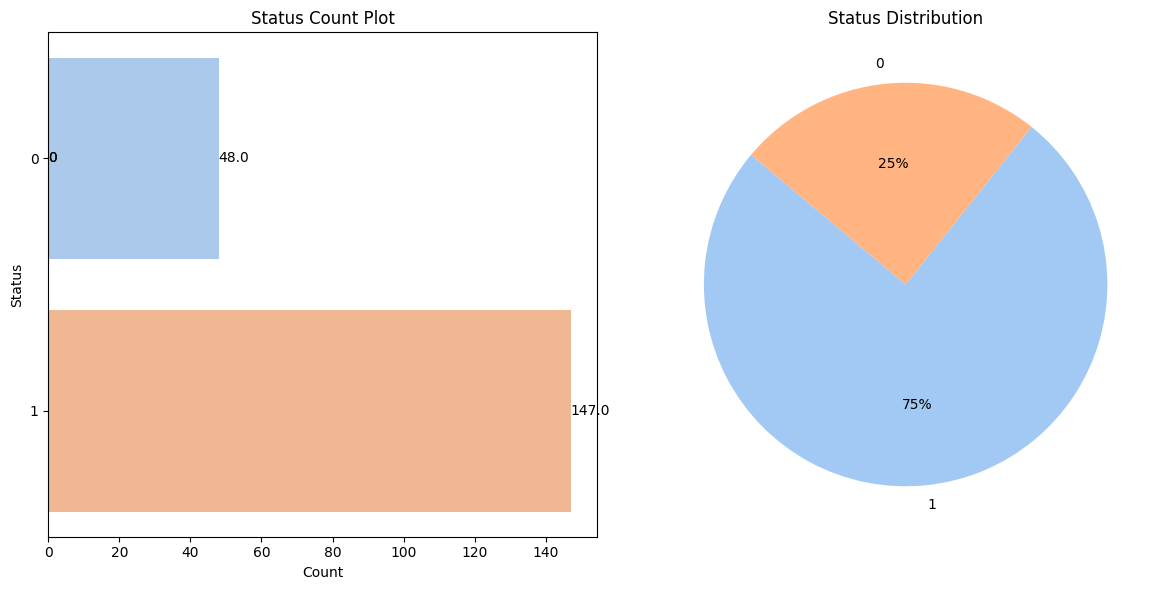

In [11]:


sns.set_palette("pastel")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(y=data['status'], ax=ax1, hue=data['status'], dodge=False)
ax1.set_xlabel("Count")
ax1.set_ylabel("Status")
ax1.set_title("Status Count Plot")
ax1.legend_.remove()  # Removing legend to avoid redundancy

for p in ax1.patches:
    count = p.get_width()  # Get width (count) of the bar
    ax1.annotate(f"{count}", (p.get_width(), p.get_y() + p.get_height() / 2), ha="left", va="center")

status_counts = data["status"].value_counts()

ax2.pie(status_counts, labels=status_counts.index, autopct='%1.0f%%', colors=sns.color_palette("pastel"), startangle=140)
ax2.set_title("Status Distribution")

plt.tight_layout()
plt.show()


In [12]:
data.drop(columns=['name'], inplace=True)

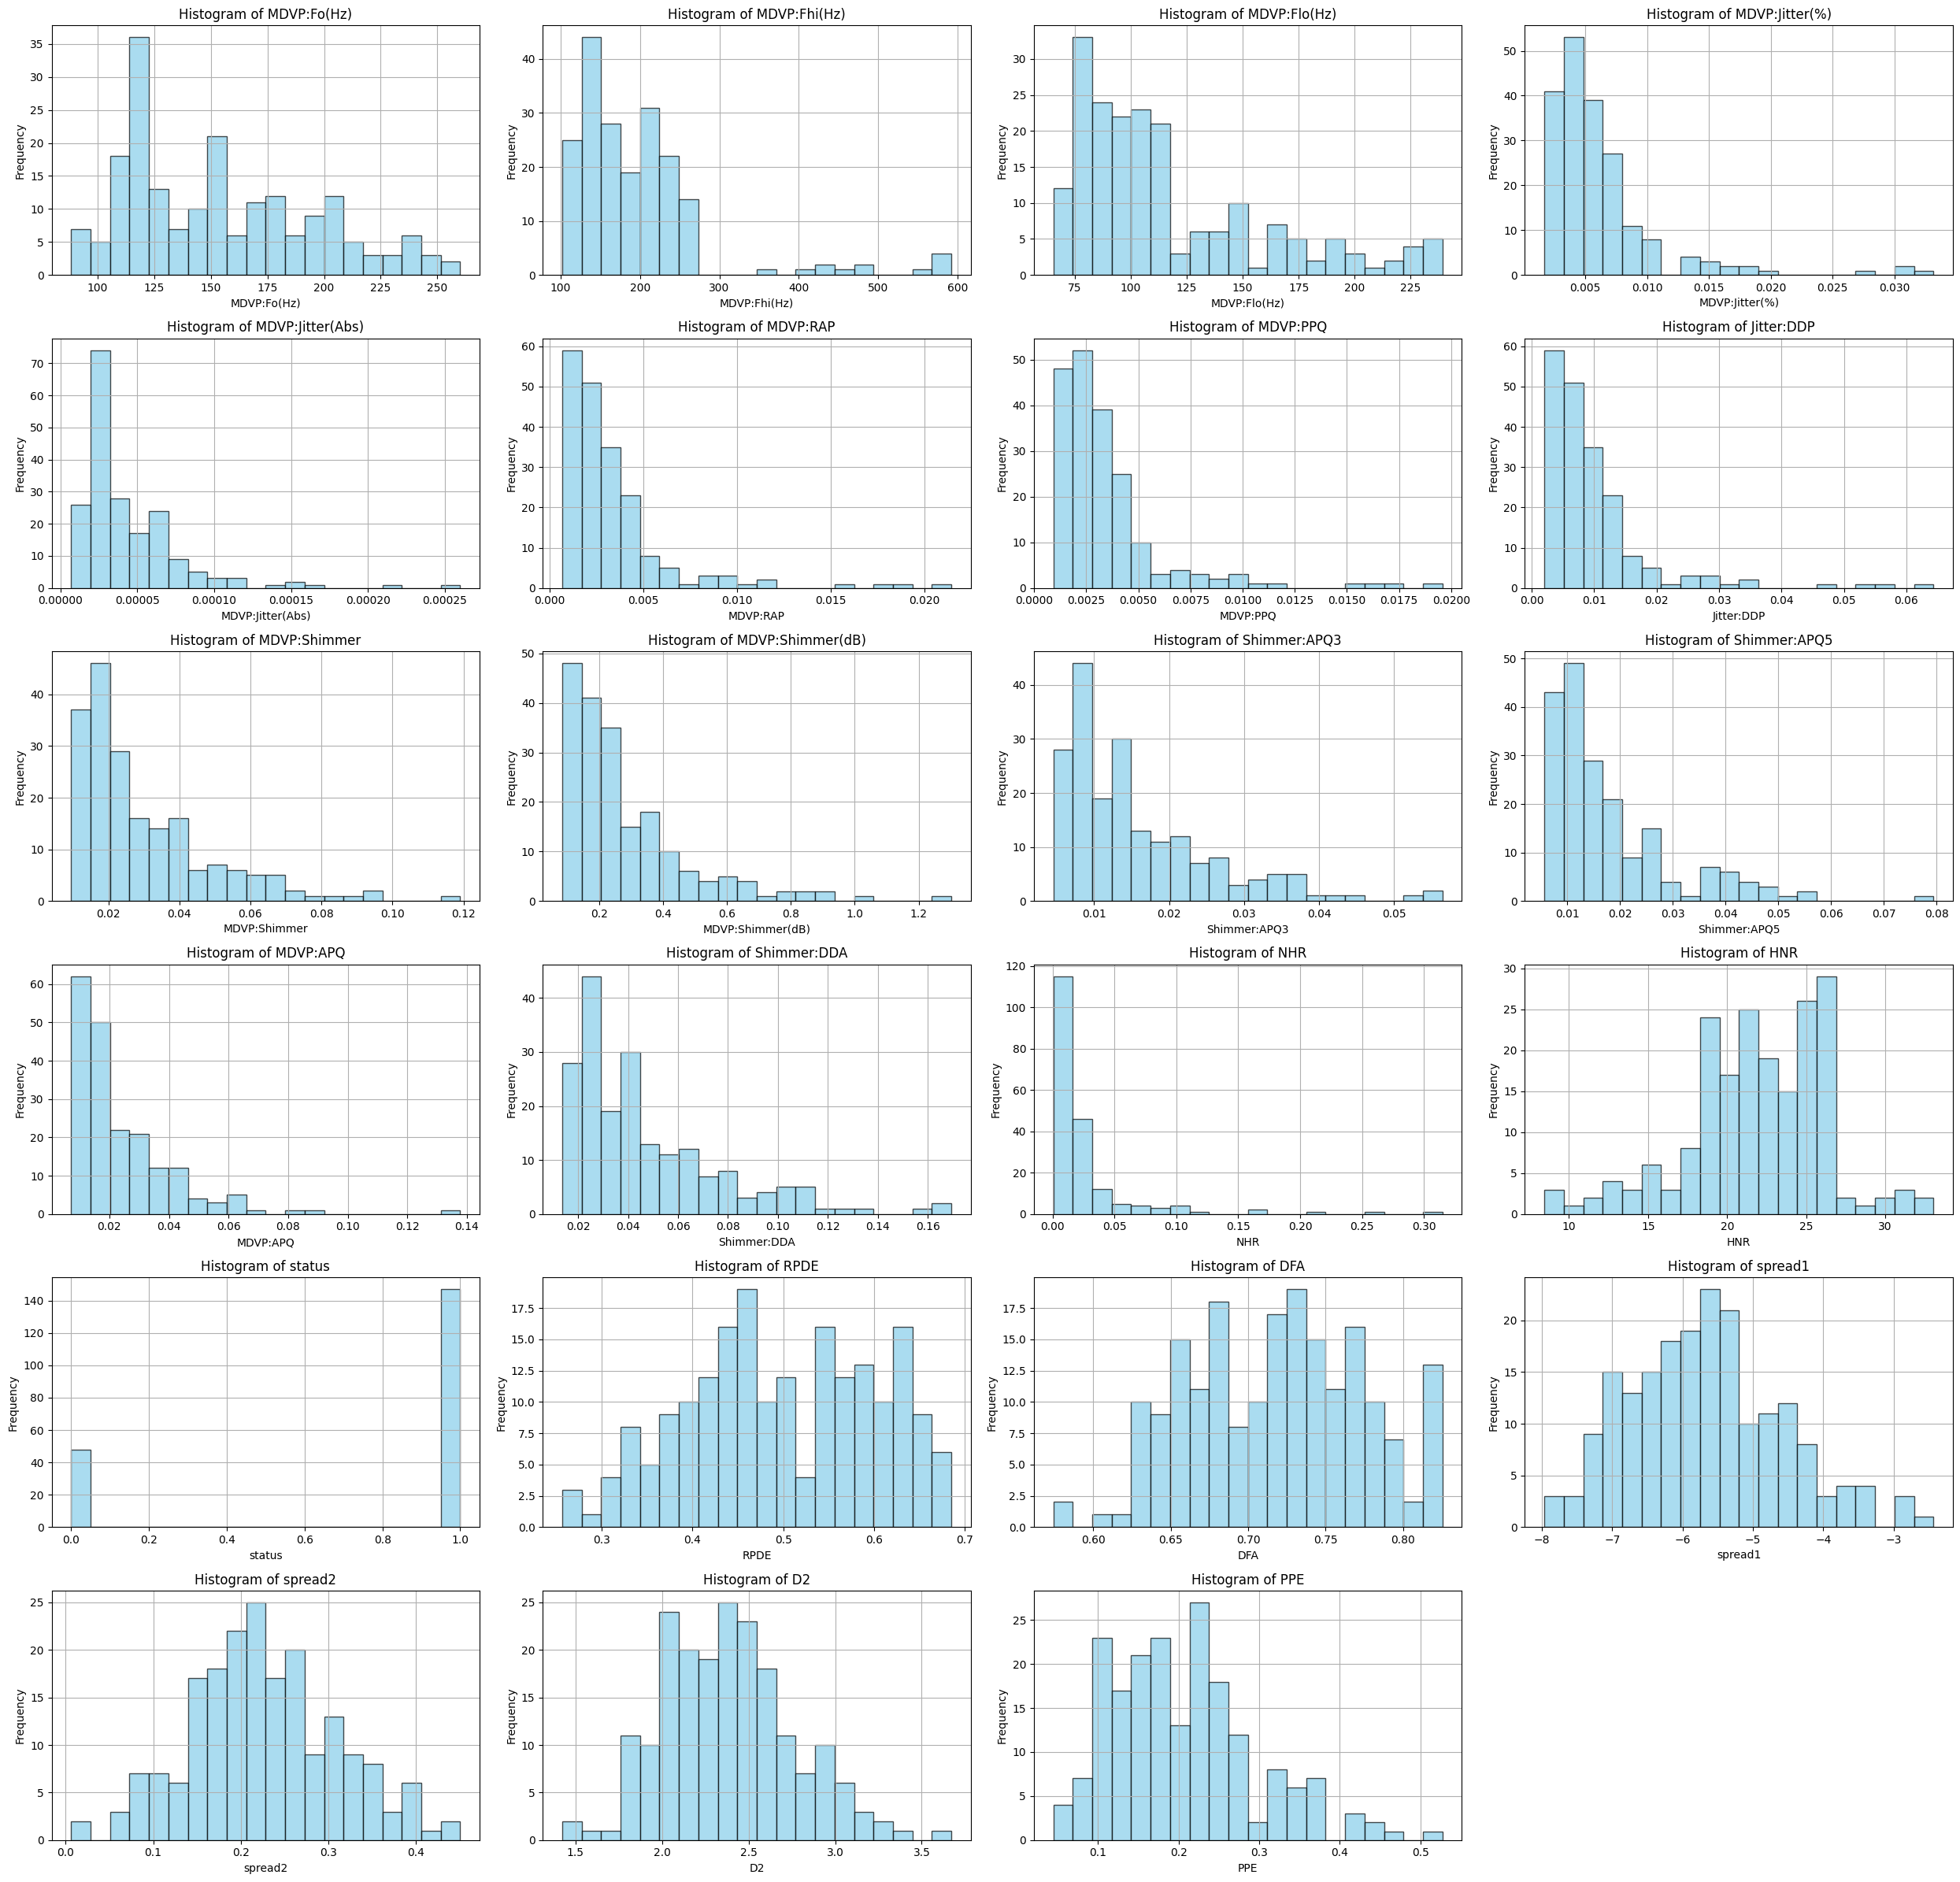

In [13]:

num_rows = (len(data.columns) + 3) // 4  # Calculate number of rows needed
plt.figure(figsize=(25, num_rows * 4))

# Iterate through each column in the DataFrame
for i, column in enumerate(data.columns):
    plt.subplot(num_rows, 4, i + 1)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

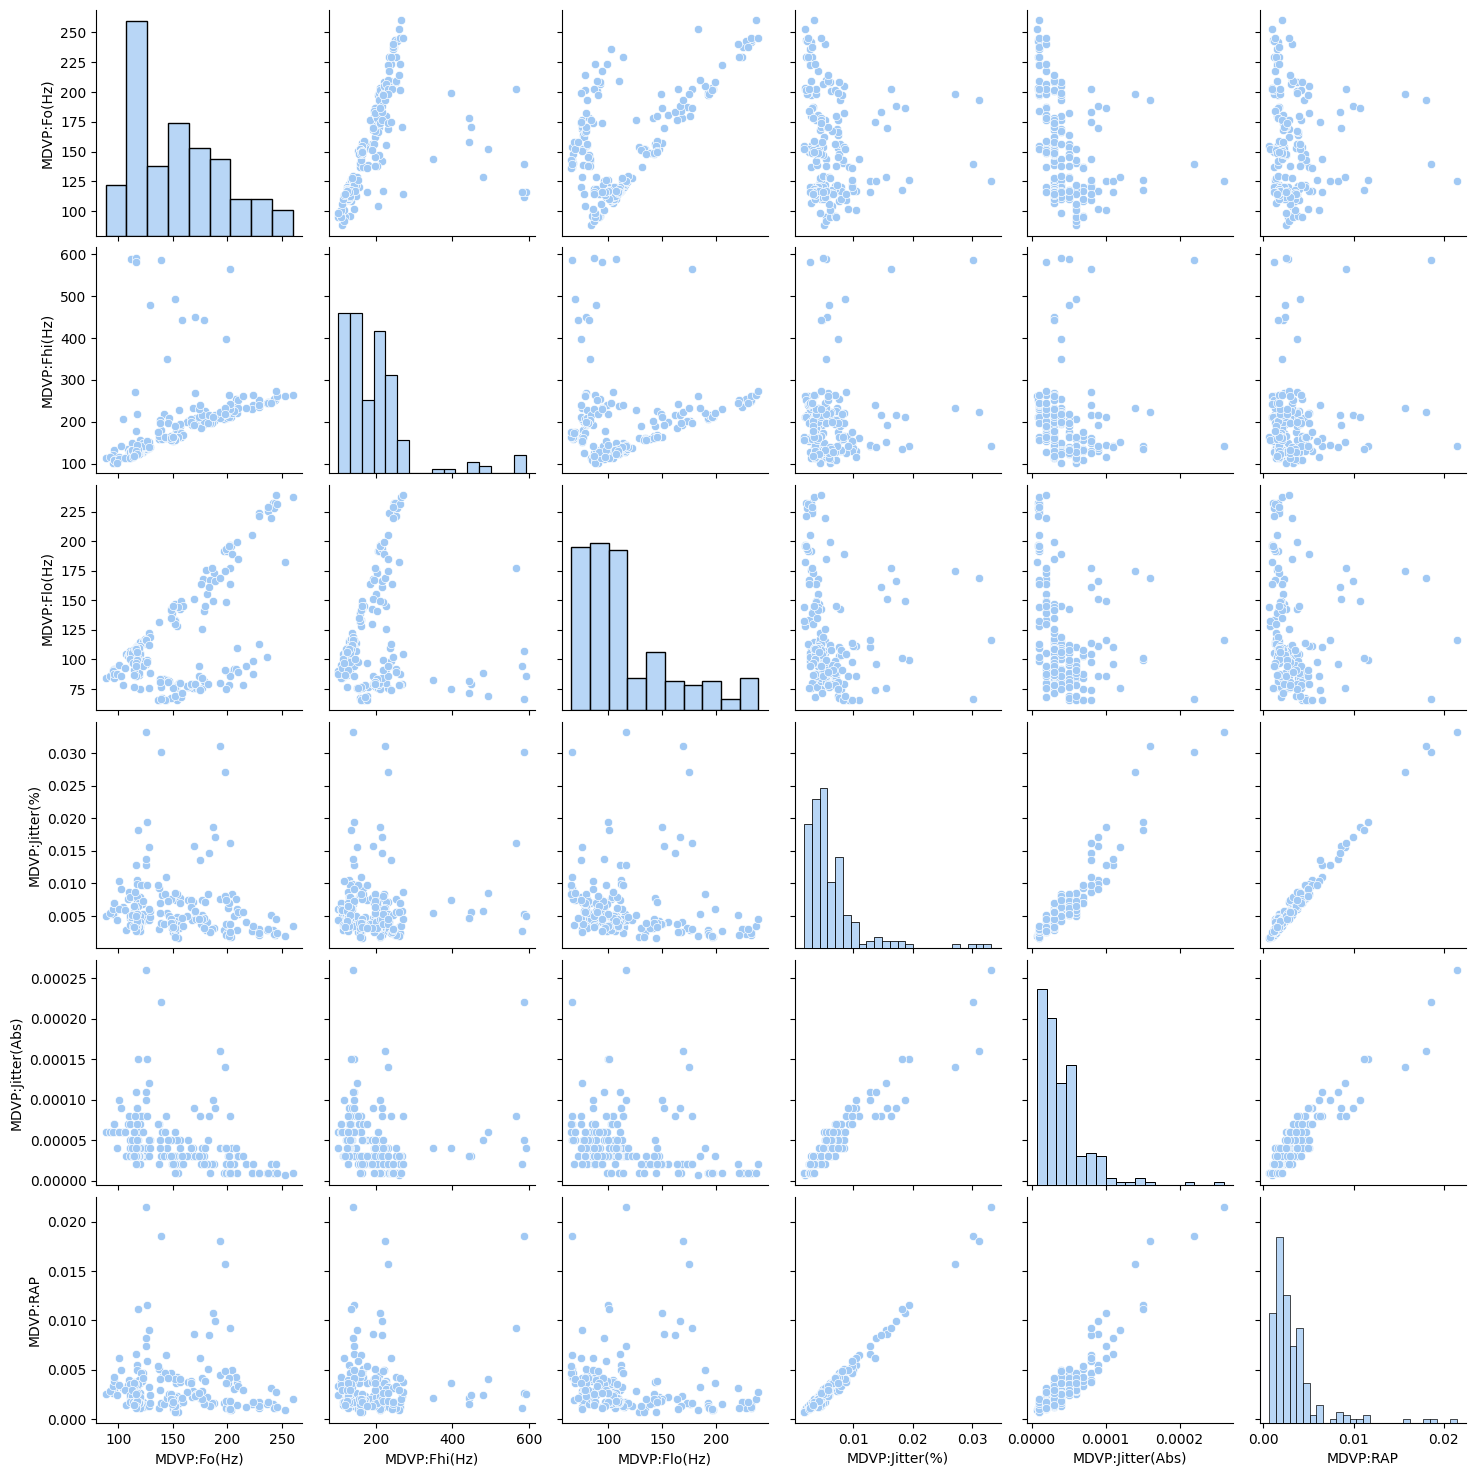

In [14]:
plt.figure(figsize=(12, 10))

# Create pairplot
sns.pairplot(data.iloc[:, 0:6])

plt.show()


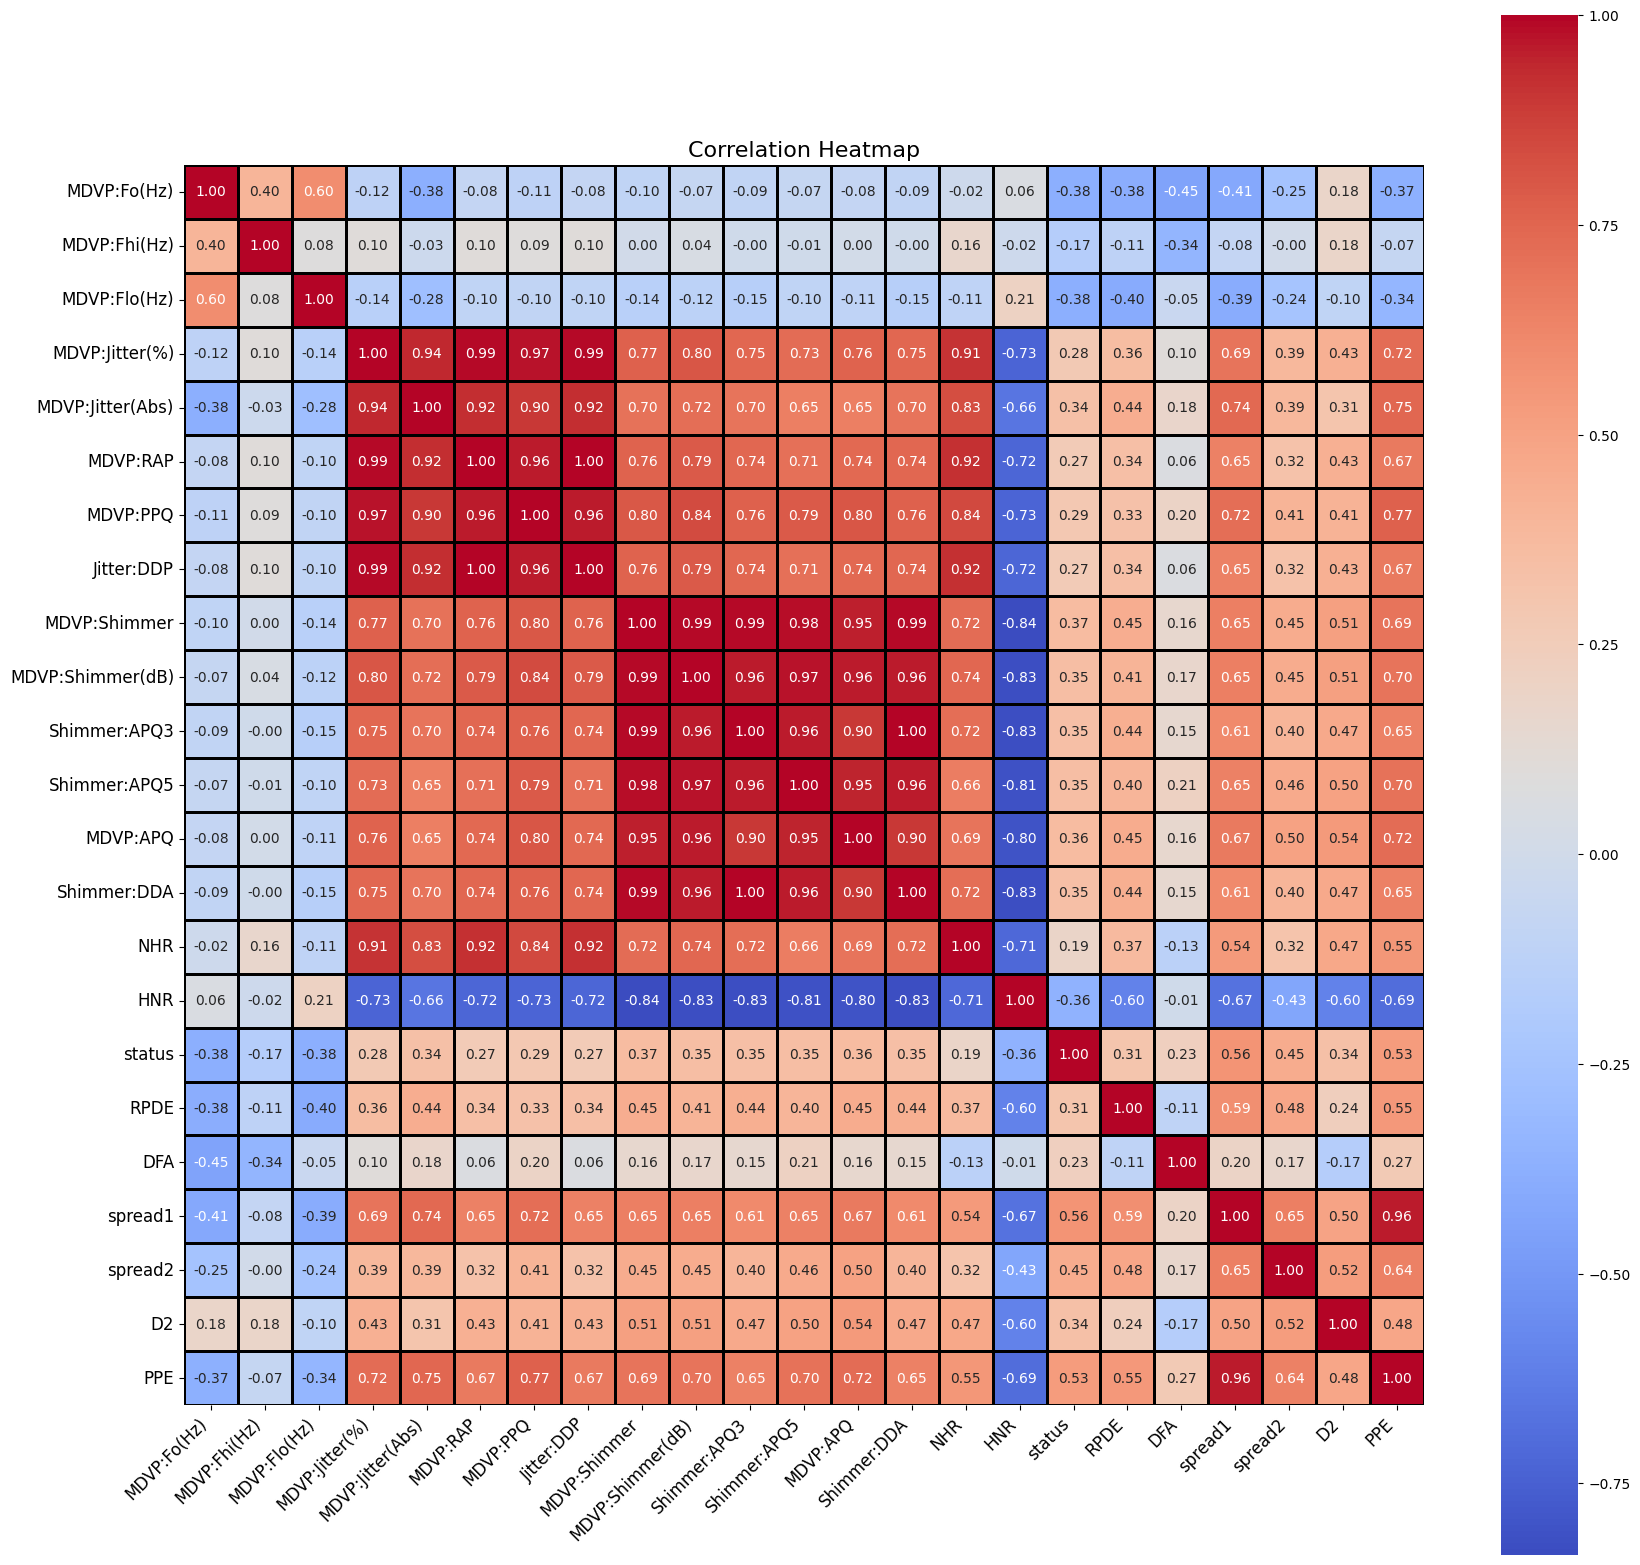

In [15]:

# Set the figure size
plt.figure(figsize=(20, 20))

# Generate the heatmap with customizations
heatmap = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, linecolor='black', square=True)

# Customize axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', fontsize=12)

# Set title
plt.title('Correlation Heatmap', fontsize=16)

plt.show()


**Dropping unnesessary columns**

In [16]:
data.drop(columns=['MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA'],inplace=True)

In [17]:
x =data.drop(columns=['status'], axis=1)
y=data['status']

# **Handling imbalance**

In [18]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
x_smote, y_smote = smote.fit_resample(x, y)


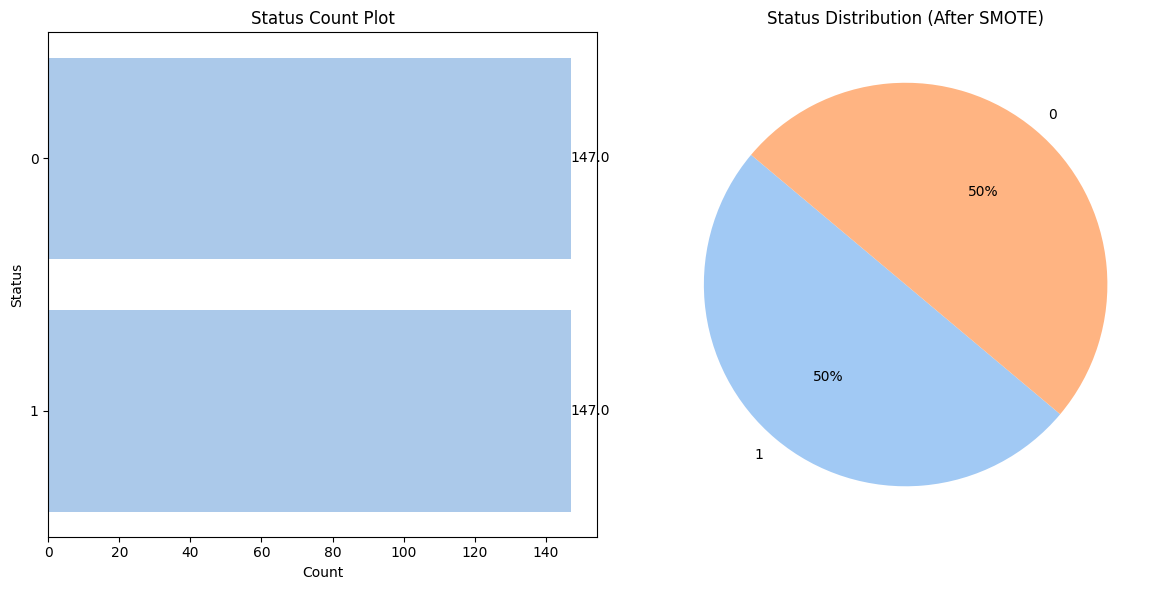

In [19]:
# Convert back to DataFrame
data_smote = pd.concat([pd.DataFrame(x_smote, columns=x.columns), pd.DataFrame(y_smote, columns=['status'])], axis=1)

sns.set_palette("pastel")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot count plot
sns.countplot(y=data_smote['status'], ax=ax1)
ax1.set_xlabel("Count")
ax1.set_ylabel("Status")
ax1.set_title("Status Count Plot")

# Annotate count plot
for p in ax1.patches:
    count = p.get_width()  # Get width (count) of the bar
    ax1.annotate(f"{count}", (p.get_width(), p.get_y() + p.get_height() / 2), ha="left", va="center")

# Plot pie chart
status_counts_smote = data_smote["status"].value_counts()
ax2.pie(status_counts_smote, labels=status_counts_smote.index, autopct='%1.0f%%', colors=sns.color_palette("pastel"), startangle=140)
ax2.set_title("Status Distribution (After SMOTE)")

plt.tight_layout()
plt.show()

# **Splitting the data**

In [20]:

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (188, 14)
Shape of X_val: (47, 14)
Shape of X_test: (59, 14)
Shape of y_train: (188,)
Shape of y_val: (47,)
Shape of y_test: (59,)


# **Trainning the models**

In [21]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000,solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42,max_depth=3,min_samples_split=4),

    'XGBoost': XGBClassifier(max_depth=4,min_child_weight=5,n_estimators=70),
    'Naive Bayes': GaussianNB()
}

# Initialize dictionaries to store accuracies
train_accuracies = {}
val_accuracies = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train model
    clf.fit(X_train, y_train)

    # Predictions on training and validation data
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)

    # Calculate training and validation accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store accuracies in dictionaries
    train_accuracies[name] = train_accuracy
    val_accuracies[name] = val_accuracy

    # Print results
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Validation Accuracy: {val_accuracy}")
    print("="*50)


Classifier: Logistic Regression
Training Accuracy: 0.7925531914893617
Validation Accuracy: 0.8723404255319149
Classifier: Random Forest
Training Accuracy: 0.9787234042553191
Validation Accuracy: 0.9148936170212766
Classifier: XGBoost
Training Accuracy: 0.9840425531914894
Validation Accuracy: 0.9361702127659575
Classifier: Naive Bayes
Training Accuracy: 0.7819148936170213
Validation Accuracy: 0.8085106382978723


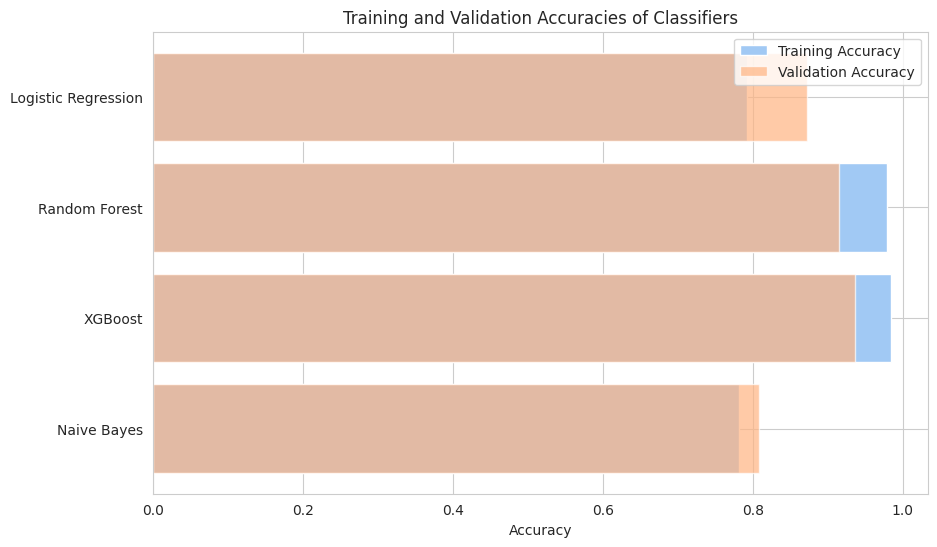

In [22]:

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Get the names of the classifiers
classifier_names = list(classifiers.keys())

# Get the training and validation accuracies
train_acc = list(train_accuracies.values())
val_acc = list(val_accuracies.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(classifier_names, train_acc,  label='Training Accuracy')
plt.barh(classifier_names, val_acc, alpha=0.7, label='Validation Accuracy')
plt.xlabel('Accuracy')
plt.title('Training and Validation Accuracies of Classifiers')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


# **Evaluating the best models**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
selected_classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, max_depth=3, min_samples_split=4, n_estimators=100),
    'XGBoost': XGBClassifier(max_depth=4, min_child_weight=5, n_estimators=70)
}

# Initialize dictionaries to store test accuracies
test_accuracies = {}

# Train and evaluate each classifier
for name, clf in selected_classifiers.items():
    # Train model
    clf.fit(X_train, y_train)

    # Predictions on test data
    y_test_pred = clf.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store test accuracy in dictionary
    test_accuracies[name] = test_accuracy

    # Print results
    print(f"Classifier: {name}")
    print(f"Test Accuracy: {test_accuracy}")
    print("="*50)

# Choose the best model based on test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)
print(f"Best Model: {best_model}, Test Accuracy: {test_accuracies[best_model]}")


Classifier: Random Forest
Test Accuracy: 0.9830508474576272
Classifier: XGBoost
Test Accuracy: 0.9491525423728814
Best Model: Random Forest, Test Accuracy: 0.9830508474576272


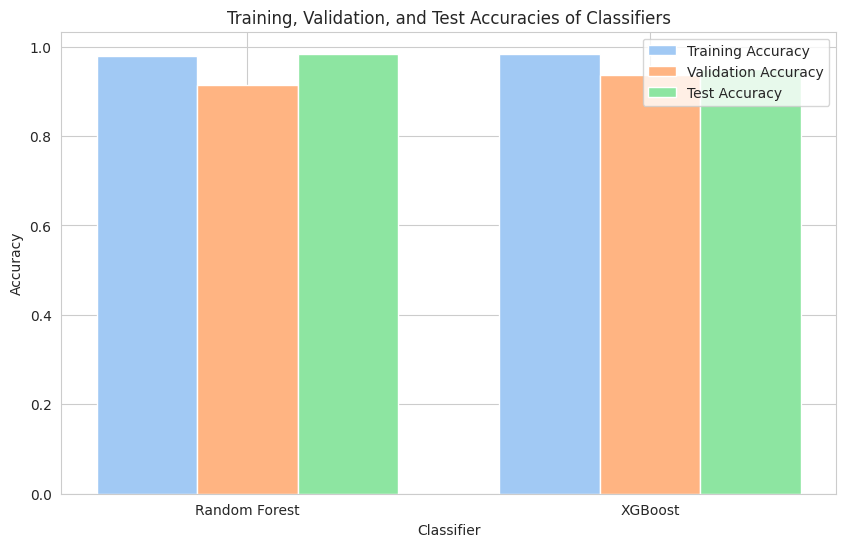

In [28]:

# Set seaborn style and palette
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Extract accuracies for plotting
classifier_names = list(selected_classifiers.keys())
train_acc = [train_accuracies[name] for name in classifier_names]
val_acc = [val_accuracies[name] for name in classifier_names]
test_acc = [test_accuracies[name] for name in classifier_names]

# Plotting
bar_width = 0.25
index = np.arange(len(classifier_names))
plt.bar(index, train_acc, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, val_acc, bar_width, label='Validation Accuracy')
plt.bar(index + 2 * bar_width, test_acc, bar_width, label='Test Accuracy')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracies of Classifiers')
plt.xticks(index + bar_width, classifier_names)
plt.legend()
plt.show()

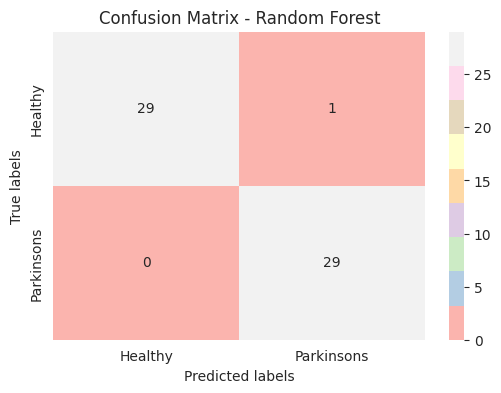

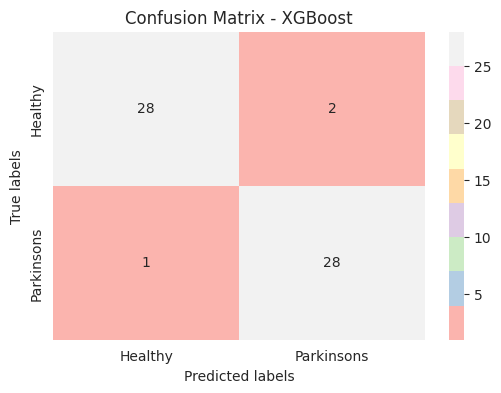

In [32]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each classifier
for name, clf in classifiers.items():
    # Train model
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, ['Healthy', 'Parkinsons'], f'Confusion Matrix - {name}')
